# DSCI 100 Group 28 Project Report:

## Title: Predictability of Heart Disease From Clinical Factors

#### Authors:
##### Ivy Li 80002512
##### Wendy Liang 26036525
##### Julia Hudea 18271156

## Introduction:
Heart disease, also known as cardiovascular disease, is a predominant cause of death globally, accounting for 17.9 million mortalities annually. In addition to lifestyle habits and medical treatments, early identification of individuals at high risk for heart disease is crucial for effective prevention. Furthermore, there is growing interest in developing predictive models that can accurately assess the risk of heart disease diagnosis based on various cardiovascular conditions and factors.

In this project, our aim is to determine the feasibility of predicting the likelihood of an individual having heart disease based on routine clinical assessments associated with the disease, through a classification model.

Our team decided to work with the Heart Disease Data from UCI Machine Learning Repository, in particular the “reprogressed.hungarian.data”. The dataset contains 14 variables associated with heart disease. When selecting variables to predict the heart disease diagnosis, we kept in mind that it is essential to choose factors that are known to have a significant impact on heart health and that could potentially contribute to heart disease. Therefore, we have selected:


Heart disease is also a categorical data (0=un-diagnosed, or 1=diagnosed).

Our prediction model aims to answer the questions: How accurately do routine clinical assessment values such as XXX predict the diagnosis of heart disease?

#### LEGEND:

1. age = age
2. sex = sex (1/0)
3. cp = chest pain (4 classifications)
4. trestbps = resting blood pressure (mm Hg)
5. chol = serum cholestrol (mg/dl)
6. fbs = fasting blood sugar (1/0, yes/no)
7. restecg = resting electrocardiographic results  (3 classifications)
8. thalach = maximum heart rate achieved 
9. exang = exercise induced angina (1/0, yes/no)
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope = slope of the peak exercise ST segment  (3 classifications)
12. ca = number of major vessels (0-3) colored by flourosopy 
13. hal = histidine ammonia-lyase (HAL) gene : 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. num = diagnosis of heart disease (angiographic disease status) (0/1) 	-- Value 0: < 50% diameter narrowing  	-- Value 1: > 50% diameter narrowing 

## Methods and Results

Since the predictors are numerical and the variable to be predicted is categorical,  k-nn classification will be used. We will calculate a prediction accuracy to determine the accuracy of the prediction and answer the question being evaluated.

### 1. Reading and Cleaning the Data

We first loaded the “reprogressed.hungarian.data” into the Jupyter Notebook. The data required some cleaning and wrangling to get rid of NA’s and select the variables of interest. We also converted the variable to be predicted into a factor.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(ggplot2)
options(repr.matrix.max.rows = 6)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


ERROR: Error in library(tidymodels): there is no package called 'tidymodels'


In [7]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"

hungarian_heart_disease_data <- read.csv(url, header = FALSE, na.strings = "?", stringsAsFactors = TRUE)

colnames(hungarian_heart_disease_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "hal", "num")

hungarian_heart_disease_data <- mutate(hungarian_heart_disease_data, num = as_factor(num))


heart_disease_tidy <- hungarian_heart_disease_data|>
                      drop_na()
#    select(-slope, -ca, -hal) |> #remove all columns w/ NA
#    select(-sex,-cp, -fbs, -restecg, -exang, -oldpeak) #remove all column with categorical variable

heart_disease_tidy





ERROR: Error in parse(text = x, srcfile = src): <text>:10:52: unexpected '>'
9: 
10: heart_disease_tidy <- hungarian_heart_disease_data|>
                                                       ^


## 2. Visualizing the Data Set

We first wanted to visualize the relationship between each predictor and the heart disease diagnosis. Therefore, we used box plots to display the value of the predictor split into yes and no. 

In [10]:
### SEE DISTRIBUTION OF DIAGNOSIS (NUM)

heart_disease_tidy |>
    group_by(num) |>
    summarize(count=n()) 


ERROR: Error in parse(text = x, srcfile = src): <text>:3:21: unexpected '>'
2: 
3: heart_disease_tidy |>
                       ^


In [8]:
options(repr.plot.width = 10, repr.plot.height = 10)

heart_disease_tidy |>
    pivot_longer(cols = -num, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = num)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(facets = vars(category), scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20)) 

ERROR: Error in parse(text = x, srcfile = src): <text>:3:25: unexpected '>'
2: 
3: heart_disease_relevant |>
                           ^


In [ ]:
heart_disease_ <- heart_disease_train |>
    select(age, thalach, chol, restecg, cp, num) |>
    pivot_longer(cols = c(age, thalach, chol, restecg, cp), names_to = "variable", values_to = "value") |>
    ggplot(aes(x = variable, y = value)) +
    geom_boxplot() +
    labs(x = "Predictor Variable", y = "Value", title = "Distribution of Predictor Variables Based on Presence of Heart Disease")

heart_disease_plot

## Data Analysis

## TODO: EXPLAIN WHY REMOVE NA AND CATEGORICAL VAR

### **We removed columns slope (slope of the peak exercise ST segment), ca (number of major vessels), hal (histidine ammonia-lyase (HAL) gene) due to the fact that majority of the data is NA, which will be very supportive in developing our prediciton model.**


## categorical reason: we wanted a final visualization using scatter plot so wanted only numerical

## TODO: EXPLAIN WHY REMOVE NA AND CATEGORICAL VAR

### explain: a bit of variance but somewhat even (will prob not have big effect so proceed)

## TODO: EXPLAIN WHY REMOVE NA AND CATEGORICAL VAR

### explain thalach & age have greater variance in distribution and distinction btw diagnosis and non-diagnosis group (labeled w/ diff colour). For both variables, we can clearly distinguish, for example in age, any values below 45 would more likely be predicted 0 (non-diagnosed), and any above 45 would more likely be predicted 1 (diagnosised). In contrast, chol and trestbps has greater overlap and less clear distinction.


### Perform K-nearest Neighbour Classification

Select the predictors and response variable. Scale and center the selected variables.

In [ ]:
heart_disease_scaled <- heart_disease_relevant |> 
                        select(num, age, thalach) |>
                        mutate(age = scale(age, center = TRUE), 
                        thalach = scale(thalach, center = TRUE))
head(heart_disease_scaled)

Split the dataset into training and test set.

In [7]:
set.seed(4000)

heart_disease_split <- initial_split(heart_disease_relevant, prop = 0.75, strata = num)  
heart_disease_train <- training(heart_disease_split)   
heart_disease_test <- testing(heart_disease_split)
head(heart_disease_train)
head(heart_disease_test)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
3,29,1,2,140,NA,0,0,170,0,0,0
4,30,0,1,170,237,0,1,170,0,0,0
5,31,0,2,100,219,0,1,150,0,0,0
7,32,1,2,110,225,0,0,184,0,0,0
10,34,0,2,130,161,0,0,190,0,0,0
11,34,1,2,150,214,0,1,168,0,0,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
1,28,1,2,130,132,0,2,185,0,0,0
2,29,1,2,120,243,0,0,160,0,0,0
6,32,0,2,105,198,0,0,165,0,0,0
8,32,1,2,125,254,0,0,155,0,0,0
9,33,1,3,120,298,0,0,185,0,0,0
16,35,1,2,150,264,0,0,168,0,0,0


Pass the vector and the predictors to the recipe function.

In [8]:
heart_disease_recipe <- recipe(num ~ age + thalach, data = heart_disease_train) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())
heart_disease_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

To enhance the performance of the model by selecting the appropriate number of neighbors, 5-fold cross-validation is used for more accurate accuracy estimation.

In [9]:
set.seed(4000)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")

vfold <- vfold_cv(heart_disease_train, v = 5, strata = num)
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

knn_results <- workflow() |>
  add_recipe(heart_disease_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = vfold, grid = k_vals) |>
  collect_metrics()
accuracies <- filter(knn_results, .metric == "accuracy")
accuracies


x Fold1: preprocessor 1/1, model 1/1 (predictions):
  Error in `mutate()`:
  ! Problem while computing `.row = orig_rows`.
  ✖ `.row` must be size 44 or 1, not 45.



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5890592,4,0.02895301,Preprocessor1_Model01
2,accuracy,binary,0.5774313,4,0.01765742,Preprocessor1_Model02
3,accuracy,binary,0.6515592,4,0.02784713,Preprocessor1_Model03
4,accuracy,binary,0.6458774,4,0.02632733,Preprocessor1_Model04
5,accuracy,binary,0.6573732,4,0.03136806,Preprocessor1_Model05
6,accuracy,binary,0.6575053,4,0.03239732,Preprocessor1_Model06
7,accuracy,binary,0.6688689,4,0.04529473,Preprocessor1_Model07
8,accuracy,binary,0.6745507,4,0.04890000,Preprocessor1_Model08
9,accuracy,binary,0.7143235,4,0.03265890,Preprocessor1_Model09


In [10]:
min <- knn_results |>
            filter(.metric == 'rmse') |>
            arrange(mean) |> 
            slice(1) #OBTAIN BEST K w/ minimum RMSPE

min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>


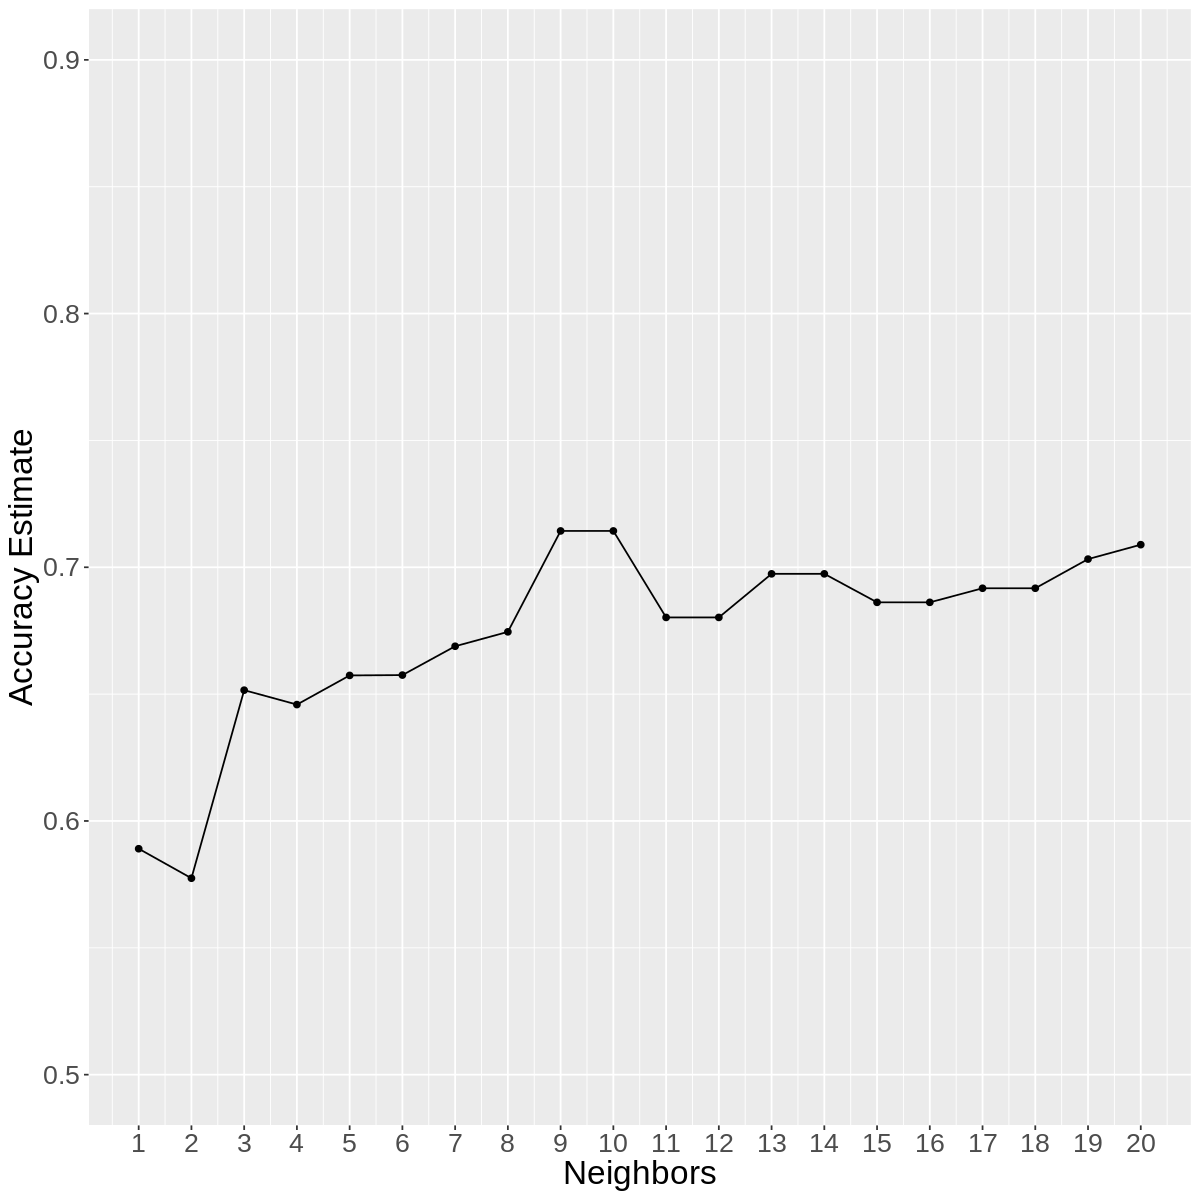

In [11]:
options(repr.plot.width = 10, repr.plot.height = 10)

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  scale_x_continuous(breaks = seq(0, 25, by = 1)) +
  scale_y_continuous(limits = c(0.5, 0.9)) +
  theme(text = element_text(size = 20))

cross_val_plot

Based on the plot, we choose K = 9 as it yields the highest estimated accuracy. Deviating slightly from this value doesn't lead to a significant decrease in accuracy. Moreover, K = 9 is not excessively large, which means that the cost of training the model is still feasible. 

In [12]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
      set_engine("kknn") |>
      set_mode("classification")

In [13]:
heart_disease_fit <- workflow() |>
      add_recipe(heart_disease_recipe) |>
      add_model(knn_spec) |>
      fit(data = heart_disease_train)
heart_disease_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(10,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3150685
Best kernel: rectangular
Best k: 10

Pass the fitted model and the test dataset to the predict to prediction.

In [14]:
heart_disease_test_predictions <- predict(heart_disease_fit , heart_disease_test) |>
       bind_cols(heart_disease_test)
head(heart_disease_test_predictions)

.pred_class,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
0,28,1,2,130,132,0,2,185,0,0,0
0,29,1,2,120,243,0,0,160,0,0,0
0,32,0,2,105,198,0,0,165,0,0,0
0,32,1,2,125,254,0,0,155,0,0,0
0,33,1,3,120,298,0,0,185,0,0,0
0,35,1,2,150,264,0,0,168,0,0,0


Calculate the accuracy of the classification model.

In [15]:
heart_disease_prediction_accuracy <- heart_disease_test_predictions |>
        metrics(truth = num, estimate = .pred_class) 
heart_disease_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6351351
kap,binary,0.2065131


## TODO: point out sorta low accuracy and wanted to look more in depth so did conf matrix

In [16]:
heart_disease_conf_mat <- heart_disease_test_predictions|>
                conf_mat(truth = num, estimate = .pred_class)

heart_disease_conf_mat

          Truth
Prediction  0  1
         0 34 14
         1 13 13

## TODO: thro conf matrix, .... refer to txtbook ;)

# Final Visualization

- ## A. Without Our Model

Warning message:
“Removed 1 rows containing missing values (geom_point).”


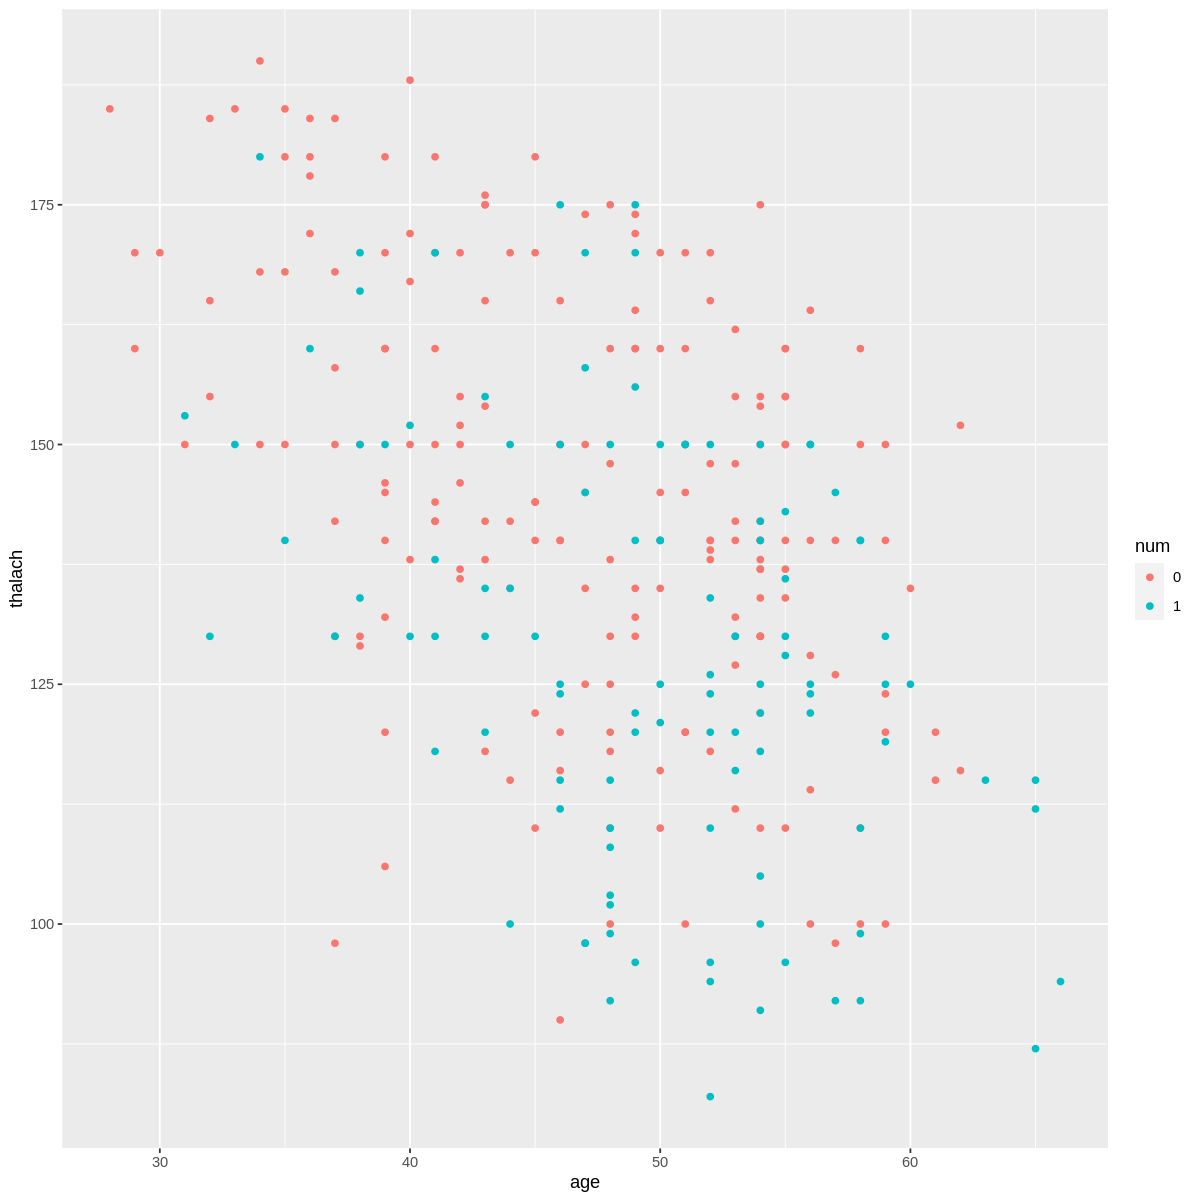

In [17]:
ggplot(hungarian_heart_disease_data, aes(x=age,y=thalach,fill=num,colour=num))+
       geom_point() 

- ## B. Implementing Our Model

Warning message:
“Removed 1 rows containing missing values (geom_point).”


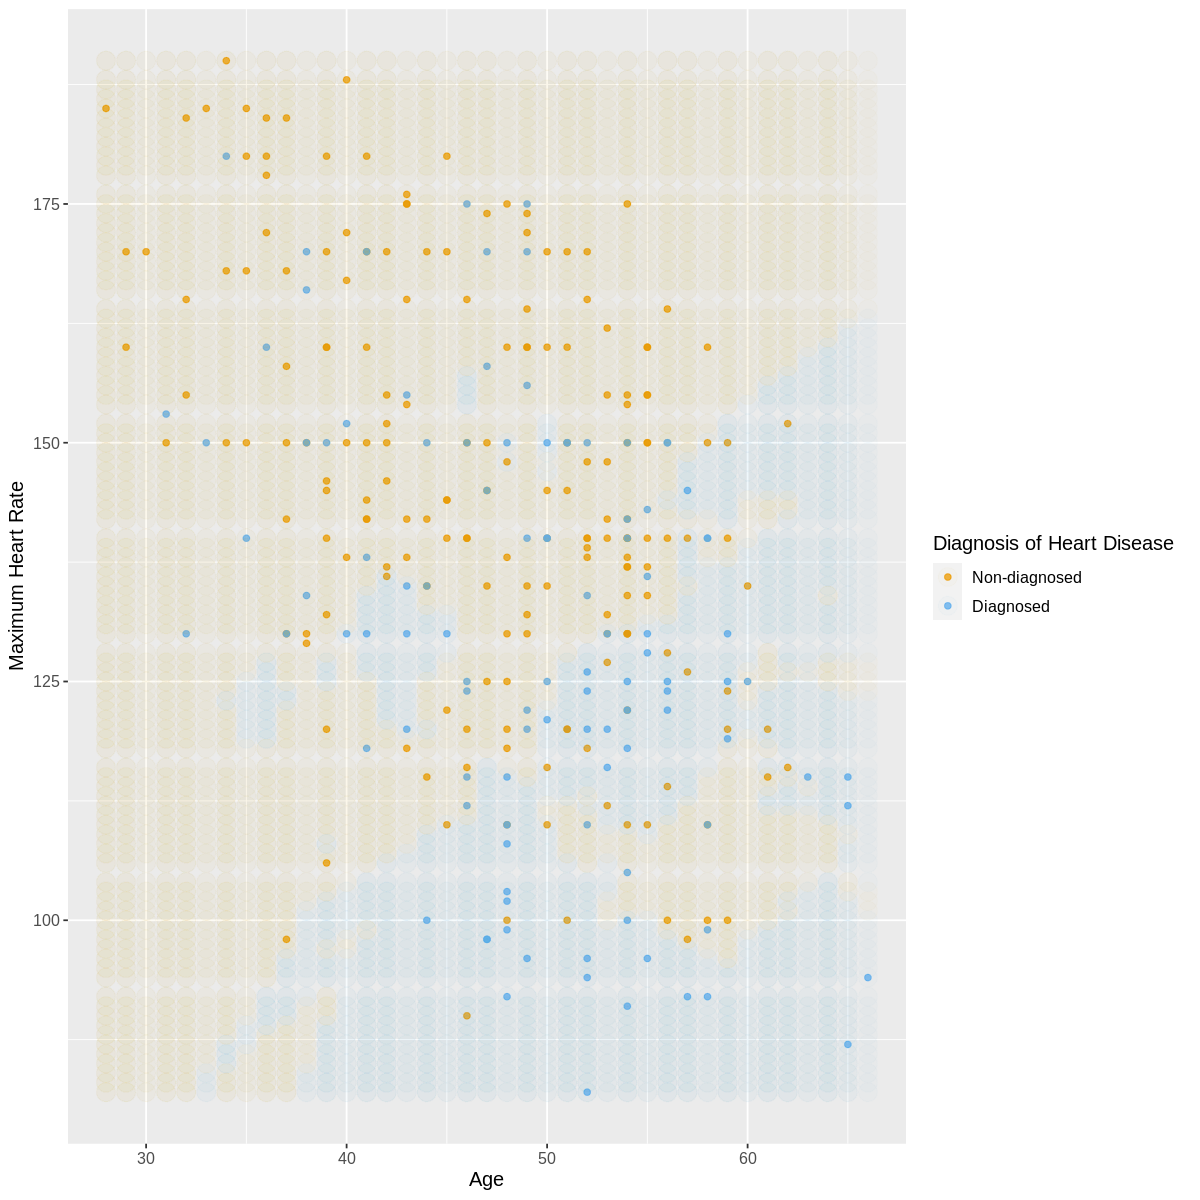

In [18]:
age_grid <- seq(min(hungarian_heart_disease_data$age,na.rm=TRUE), 
                max(hungarian_heart_disease_data$age,na.rm=TRUE), 
                length.out = 100)
thalach_grid <- seq(min(hungarian_heart_disease_data$thalach,na.rm=TRUE), 
                max(hungarian_heart_disease_data$thalach,na.rm=TRUE), 
                length.out = 100)

asgrid <- as_tibble(expand.grid(age = as.integer(age_grid), 
                                thalach = as.integer(thalach_grid)))

# use the fit workflow to make predictions at the grid points
knnPredGrid <- predict(heart_disease_fit, asgrid)

# bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) |> 
  rename(num = .pred_class)



wkflw_plot <-
  ggplot() +
  geom_point(data = hungarian_heart_disease_data, 
             mapping = aes(x = age, 
                           y = thalach, 
                           color = num), 
             alpha = 0.75) +
  geom_point(data = prediction_table, 
             mapping = aes(x = age, 
                           y = thalach, 
                           color = num), 
             alpha = 0.02, 
             size = 5) +
  labs(color = "Diagnosis of Heart Disease", 
       x = "Age", 
       y = "Maximum Heart Rate") +
  scale_color_manual(labels = c("Non-diagnosed", "Diagnosed"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 12))

wkflw_plot

## TODO: describe model:
1. area split (diagonal) ; shape
2. some patches of diagnoses in non-diagnosed area; vice versa ----> OVERFFITNG (refer to txtbook)

In [ ]:
B) OVERFITTING = DECREASING neighbor = each data point NEARBY get a 'say' on classifying new observation
                = cause 'jagged' boundaries and complicates classification and new observation will just match closest neighbor
            #model is influenced too much by training data
